<a href="https://colab.research.google.com/github/moaztayea/Time-Series-For-Pakistan-Largest-Ecommerce/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect with Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing libraries 

In [12]:
# Importing needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Loading The Data

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Pakistan e-commerce/Pakistan Largest Ecommerce Dataset.csv')

<ipython-input-3-78894a839768>:2: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Pakistan e-commerce/Pakistan Largest Ecommerce Dataset.csv')


In [4]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis 

In [5]:
# Describe the dataset
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [7]:
# Check for missing values
df.isna().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

In [8]:
df.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Get the total number of orders
total_orders = len(df)
print(total_orders)

1048575


In [14]:
# Get the total revenue
total_revenue = df['price'].sum()
print(total_revenue)

3710995301.8300004


In [15]:
# Get the average order value
average_order_value = total_revenue / total_orders
print(average_order_value)

3539.084282793315


In [17]:
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [18]:
# Get the most popular product category
most_popular_category = df['category_name_1'].value_counts().idxmax()
print(most_popular_category)

Mobiles & Tablets


In [19]:
# Get the most popular payment method
most_popular_payment_method = df['payment_method'].value_counts().idxmax()
print(most_popular_payment_method)

cod


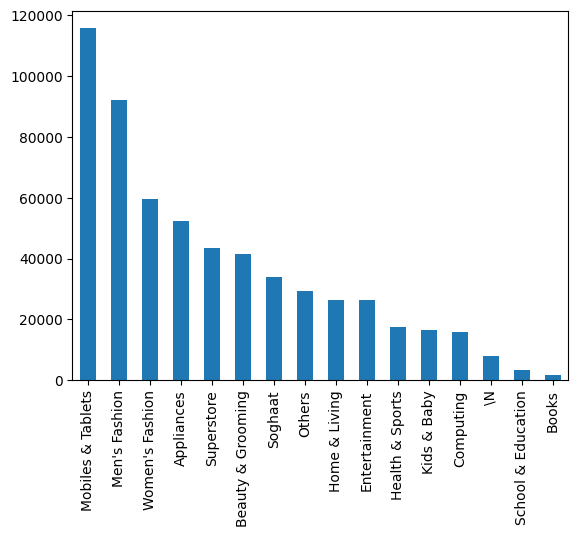

In [21]:

# Plot a bar chart of the number of orders by product category
df['category_name_1'].value_counts().plot(kind='bar')
plt.show()

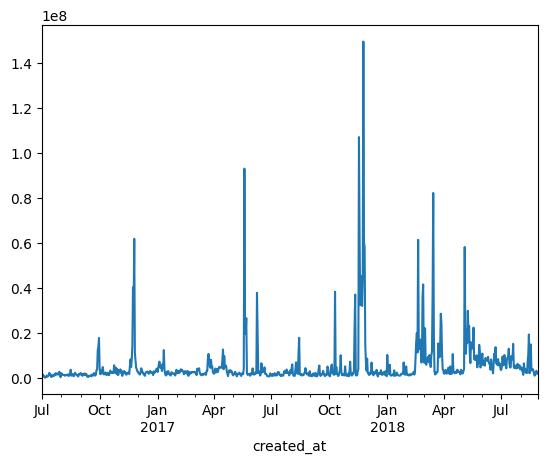

In [25]:
# Plot a line chart of the total revenue over time
df['created_at'] = pd.to_datetime(df['created_at'])
df['total_revenue'] = df['price'] * df['qty_ordered']
df.groupby('created_at')['total_revenue'].sum().plot(kind='line')
plt.show()

Time Series 

In [ ]:
# Create new DataFrame contain created_at and qty_ordered
df_series = df[['created_at','qty_ordered']]

In [ ]:
# Chechk NaN values
df_series[df_series == 'NaN']

,created_at,qty_ordered
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1048570,NaN,NaN
1048571,NaN,NaN
1048572,NaN,NaN
1048573,NaN,NaN


In [ ]:
# Drop missing values
df_series.dropna(inplace=True)

<ipython-input-11-d09055f43f98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_series.dropna(inplace=True)


In [ ]:
df_series.tail()

,created_at,qty_ordered
584519,8/28/2018,1.0
584520,8/28/2018,1.0
584521,8/28/2018,2.0
584522,8/28/2018,2.0
584523,8/28/2018,2.0


In [ ]:
# Take a sample from the data [Last year: 2018]
df_series=df_series.iloc[424832:]

In [ ]:
df_series.head()

,created_at,qty_ordered
424832,1/1/2018,1.0
424833,1/1/2018,1.0
424834,1/1/2018,1.0
424835,1/1/2018,1.0
424836,1/1/2018,1.0


In [ ]:
# Check the data types of the columns
df_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159692 entries, 424832 to 584523
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   created_at   159692 non-null  object 
 1   qty_ordered  159692 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
# Convert the created_at column to a datetime object
df_series['created_at']=pd.to_datetime(df_series['created_at'])

In [ ]:
# Convert the qty_ordered column to an integer
df_series['qty_ordered']=df_series['qty_ordered'].astype(int)

In [ ]:
# Checking Datatype Convertion
df_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159692 entries, 424832 to 584523
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   created_at   159692 non-null  datetime64[ns]
 1   qty_ordered  159692 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.7 MB


# Feature Engineering

In [ ]:
#Create a new column that sums the qty_ordered column by created_at
df_series["Total Quantity"] = df_series.groupby("created_at")["qty_ordered"].transform(sum)

In [ ]:
# Check for duplicates
df_series['Total Quantity'].duplicated()

424832    False
424833     True
424834     True
424835     True
424836     True
          ...  
584519     True
584520     True
584521     True
584522     True
584523     True
Name: Total Quantity, Length: 159692, dtype: bool

In [ ]:
# Drop duplicates
df_series=df_series.drop_duplicates(subset=['created_at','Total Quantity'])

In [ ]:
# Drop qty_ordered column
df_series=df_series.drop('qty_ordered',axis=1)

In [ ]:
# Set created_at as index
df_series.set_index('created_at',inplace=True)

In [ ]:
df_series.head()

,Total Quantity
created_at,
2018-01-01,901
2018-01-02,412
2018-01-03,493
2018-01-04,368
2018-01-05,1871


# Model selection

Perform an ADF test to check if the data is stationary

In [ ]:
# Importing ADF
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Function to check if the data is stationary or not
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
# Perform ADF on Total Quantity
adf_test(df_series['Total Quantity'])

ADF Statistics: -8.775488454961563
p- value: 2.455390420746883e-14
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Plot the ACF and PACF plots to identify the p, d, and q parameters for the ARIMA model

In [ ]:
# Importing ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

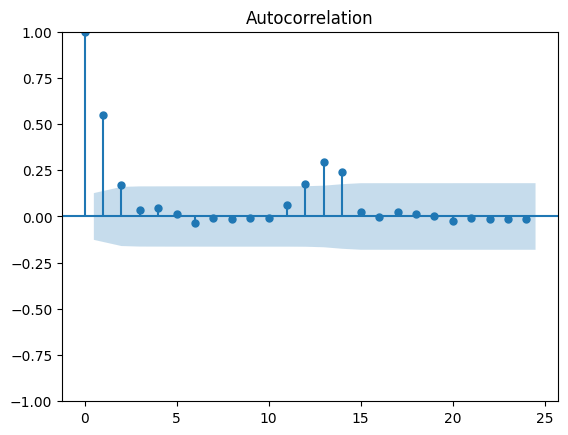

In [ ]:
# Plot Autocorrelation (ACF)
acf = plot_acf(df_series['Total Quantity'].dropna())

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


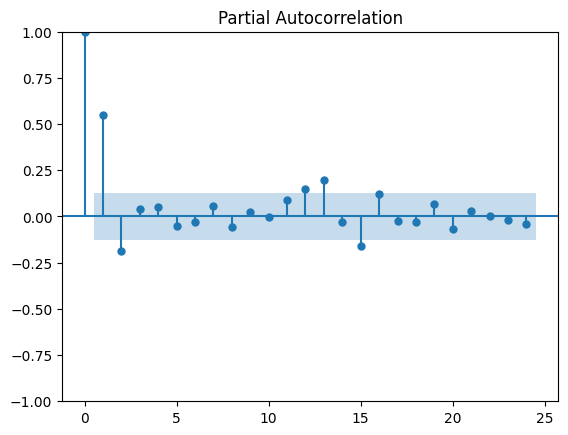

In [ ]:
# Plot Partial Autocorrelation (PACF)
pacf = plot_pacf(df_series['Total Quantity'].dropna())

In [ ]:
df_series.head()

,Total Quantity
created_at,
2018-01-01,901
2018-01-02,412
2018-01-03,493
2018-01-04,368
2018-01-05,1871


# Train  ARIMA model

In [ ]:
# train ARIMA model
model_ARIMA=ARIMA(df_series['Total Quantity'],order=(2,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
# fitting the model
model_Arima_fit=model_ARIMA.fit()

# Model evaluation

In [ ]:
# Print the summary of the ARIMA model
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Total Quantity   No. Observations:                  240
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2108.924
Date:                Fri, 12 May 2023   AIC                           4229.848
Time:                        22:21:38   BIC                           4250.732
Sample:                             0   HQIC                          4238.263
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1028.2164    384.481      2.674      0.007     274.647    1781.786
ar.L1         -0.0126      0.925     -0.014      0.989      -1.825       1.800
ar.L2         -0.0019      0.339     -0.006      0.995      -0.667       0.663
ma.L1          0.6662      0.943      0.707      0.480      -1.181       2.514
ma.L2          0.2424      0.300      0.808      0.419      -0.346       0.830
sigma2      2.573e+06   1.13e+05     22.707      0.000    2.35e+06    2.79e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8411.52
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             2.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Make predictions

In [ ]:
# Make predictions for the next 30 days
forecast_Arima = model_Arima_fit.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
print(forecast_Arima)

240     554.776151
241     882.863817
242    1030.951227
243    1028.460291
244    1028.208111
245    1028.216052
246    1028.216435
247    1028.216415
248    1028.216414
249    1028.216414
250    1028.216414
251    1028.216414
252    1028.216414
253    1028.216414
254    1028.216414
255    1028.216414
256    1028.216414
257    1028.216414
258    1028.216414
259    1028.216414
260    1028.216414
261    1028.216414
262    1028.216414
263    1028.216414
264    1028.216414
265    1028.216414
266    1028.216414
267    1028.216414
268    1028.216414
269    1028.216414
Name: predicted_mean, dtype: float64


In [ ]:
forecast_Arima = pd.DataFrame(forecast_Arima)

In [ ]:
forecast_Arima

,predicted_mean
240,554.776151
241,882.863817
242,1030.951227
243,1028.460291
244,1028.208111
245,1028.216052
246,1028.216435
247,1028.216415
248,1028.216414
249,1028.216414


<Axes: >

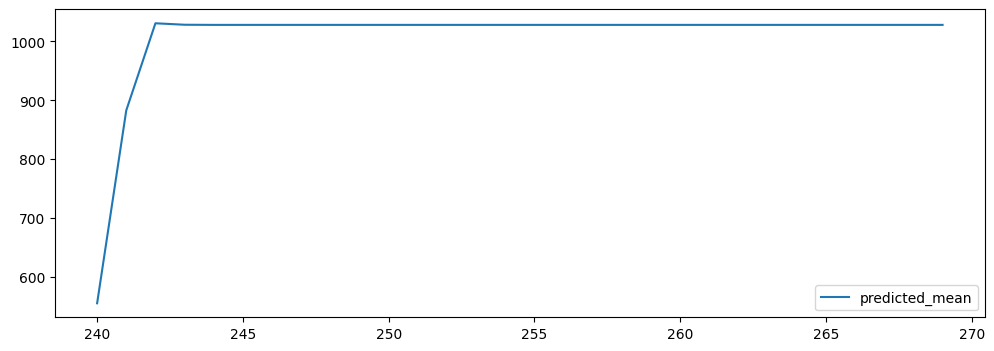

In [ ]:
forecast_Arima.plot(figsize=(12,4)) 

# Train a SARIMAX model

In [ ]:
# Train SARIMAX model
model_SARIMA=SARIMAX(df_series['Total Quantity'],order=(2,0,2),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Fitting the model
model_SARIMA_fit=model_SARIMA.fit()

In [ ]:
#Print the summary of the SARIMAX model
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                      Total Quantity   No. Observations:                  240
Model:             SARIMAX(2, 0, 2)x(0, 1, [], 12)   Log Likelihood               -2080.973
Date:                             Fri, 12 May 2023   AIC                           4171.946
Time:                                     22:22:24   BIC                           4189.092
Sample:                                          0   HQIC                          4178.864
                                             - 240                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4054      1.412     -0.287      0.774      -3.172       2.362
ar.L2         -0.0163      0.238     -0.069      0.945      -0.483       0.450
ma.L1          0.9441      1.425      0.663      0.508      -1.848       3.736
ma.L2          0.3026      0.549      0.551      0.582      -0.774       1.379
sigma2      5.122e+06   2.14e+05     23.980      0.000     4.7e+06    5.54e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2629.76
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Make predictions

In [ ]:
# Make predictions for the next 30 days
forecast_SARIMA = model_SARIMA_fit.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
print(forecast_SARIMA)

240    1507.658985
241     116.758092
242     406.518083
243     291.133904
244     242.449458
245      96.677565
246     142.836044
247     574.699048
248     357.108334
249     222.961003
250     343.014038
251     118.994947
252    1507.660804
253     116.757437
254     406.518319
255     291.133819
256     242.449489
257      96.677554
258     142.836047
259     574.699047
260     357.108334
261     222.961003
262     343.014038
263     118.994947
264    1507.660804
265     116.757437
266     406.518319
267     291.133819
268     242.449489
269      96.677554
Name: predicted_mean, dtype: float64


In [ ]:
forecast_SARIMA = pd.DataFrame(forecast_SARIMA)

In [ ]:
forecast_SARIMA

,predicted_mean
240,1507.658985
241,116.758092
242,406.518083
243,291.133904
244,242.449458
245,96.677565
246,142.836044
247,574.699048
248,357.108334
249,222.961003


<Axes: >

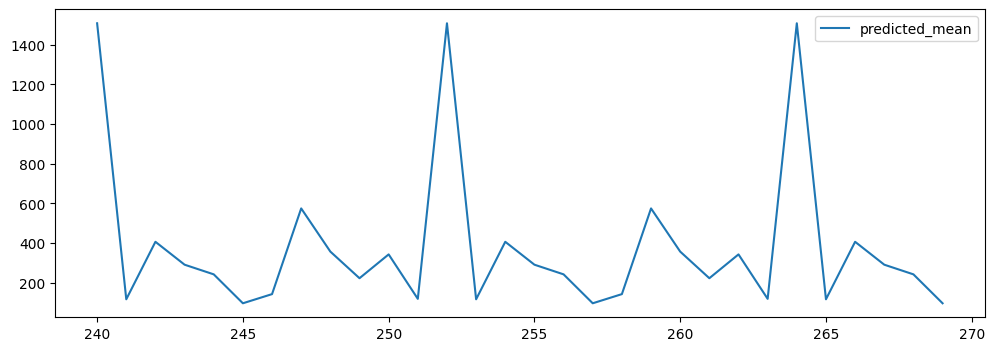

In [ ]:
forecast_SARIMA.plot(figsize=(12,4))

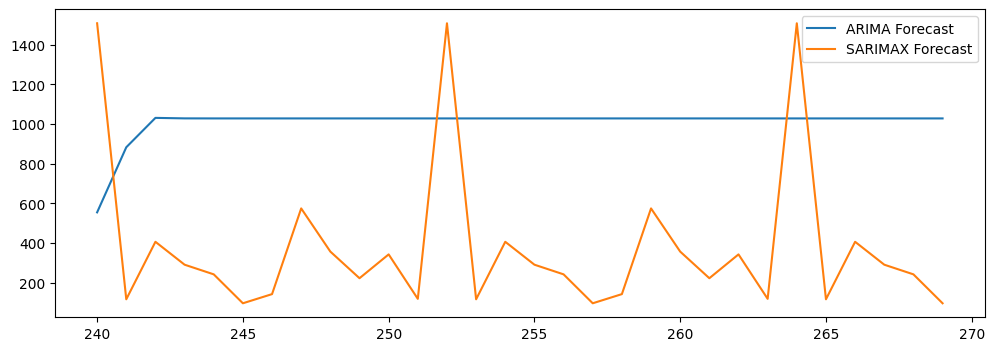

In [ ]:
# Plot actual and forecasted data
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(forecast_Arima, label='ARIMA Forecast')
plt.plot(forecast_SARIMA, label='SARIMAX Forecast')
plt.legend()
plt.show()
